In [1]:
import h5py
import numpy as np
import glob, os, re, sys
import pickle

import astro_helper as ah
from MergertreesProps import MergertreeProps

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import rc
plt.style.use('bmh')
rc('font',**{'family':'DejaVu Sans','sans-serif':['Helvetica']})

# lifetimes of 100 of the Monte Carlo trajectories produced in analyze_mergertree_mc.py

In [4]:
directory = "/n/holystore01/LABS/itc_lab/Users/sjeffreson/NGC300/MC-iterations/"
trajnames = [trajname for trajname in sorted(glob.glob(os.path.join(directory, "mc_traj_*.pkl")))]

In [5]:
num_trajs = 0
lifetimes = []
for trajname in trajnames[:100]:
    with open(trajname, 'rb') as f:
        traj = pickle.load(f)
    lifetimes += list(traj['lifetime'])
    num_trajs += 1

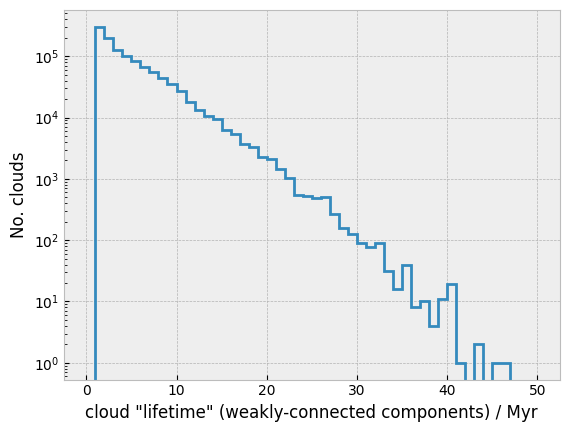

In [10]:
plt.hist(np.array(lifetimes)*ah.Gyr_to_Myr, bins=np.linspace(0., 50, 51), lw=2, histtype='step', log=True)
plt.xlabel('cloud "lifetime" (weakly-connected components) / Myr')
plt.ylabel('No. clouds')
plt.show()
plt.show()

# look at the average evolution of cloud properties, as defined by MC trajectories, as in Jeffreson et al. 2021a

In [11]:
with open(trajnames[0], 'rb') as f:
    traj = pickle.load(f)
    print(traj.keys())

dict_keys(['inttime', 'veldisp3D', 'centroid', 'mass', 'veldispz', 'divergence', 'time', 'temp', 'angmomR', 'starformrate', 'angmomz', 'vcentroid', 'lifetime'])


In [32]:
# use the time evolution of the average mass throughout cloud evolution, as an example
masses = []
for trajname in trajnames[:100]:
    with open(trajname, 'rb') as f:
        traj = pickle.load(f)
    masses += list(traj['mass']) # list of lists

In [34]:
# sort by lifetime
sorted_idcs = sorted(range(len(masses)), key=lambda i: lifetimes[i])

sorted_masses = [masses[i] for i in sorted_idcs]
sorted_lifetimes = np.array([lifetimes[i] for i in sorted_idcs])

In [46]:
# divide into ranges based on lifetimes, in Myr
lifetime_binedges = np.linspace(0, 50, 11)
lifetime_cnds = [
    np.where((sorted_lifetimes*ah.Gyr_to_Myr > left_binedge) & (sorted_lifetimes*ah.Gyr_to_Myr < right_binedge))[0]
    for left_binedge, right_binedge in zip(lifetime_binedges[:-1], lifetime_binedges[1:])
]
min_lifetime_cnds = [np.min(cnd) for cnd in lifetime_cnds]
max_lifetime_cnds = [np.max(cnd) for cnd in lifetime_cnds]
masses_evol = [np.zeros((int(right_binedge))) for right_binedge in lifetime_binedges[1:]]

In [56]:
nums_trajs = np.zeros((len(lifetime_binedges)-1))
for bmin, bmax, b in zip(min_lifetime_cnds, max_lifetime_cnds, range(len(min_lifetime_cnds))):
    masses_bin = sorted_masses[bmin:bmax]
    for masses_bin_ in masses_bin:
        masses_evol[b][:len(masses_bin_)] += masses_bin_
        nums_trajs[b] += 1
masses_evol = [masses_evol_/num_trajs for masses_evol_, num_trajs in zip(masses_evol, nums_trajs)]

/tmp/ipykernel_3970174/1041070019.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.linspace(0, len(masses_evol_)-1, len(masses_evol_)), np.log10(masses_evol_/ah.Msol_to_g))


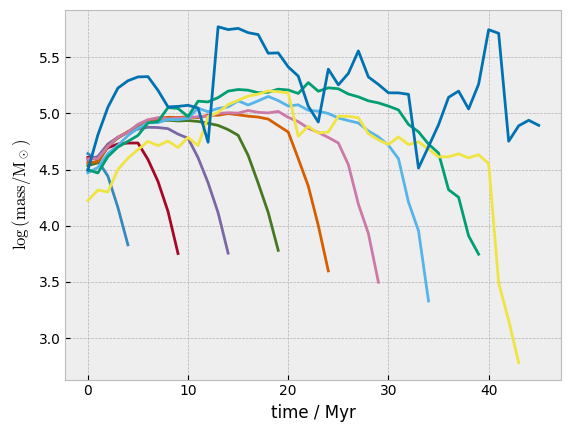

In [61]:
for masses_evol_ in masses_evol:
    plt.plot(np.linspace(0, len(masses_evol_)-1, len(masses_evol_)), np.log10(masses_evol_/ah.Msol_to_g))
plt.xlabel('time / Myr')
plt.ylabel(r'$\log{({\rm mass}/{\rm M}_\odot)}$')
plt.show()
plt.show()

### we see that longer-lived clouds tend to reach higher masses